<a href="https://colab.research.google.com/github/iamomtiwari/AIMLmini-projects-/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#/content/train.csv
path = "/content/train.csv"
mnist = pd.read_csv(path)

In [ ]:
X, y = mnist.drop(["label"], axis = 1), mnist["label"]

In [ ]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [ ]:
first_image = X.iloc[0]

<function matplotlib.pyplot.show(close=None, block=None)>

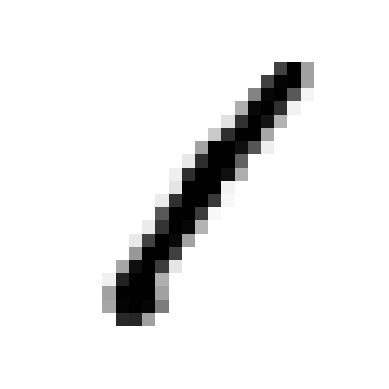

In [ ]:
plt.imshow(first_image.to_numpy().reshape(28,28), cmap='binary')
plt.axis("off")
plt.show

In [ ]:
X = X / 255

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [ ]:
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(128, activation = "relu", input_shape =(784,)))
model.add(Dense(64, activation = "relu"))
model.add(Dense(10, activation ="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import warnings
warnings.filterwarnings("ignore") #this is to ignore warnings generated by code

In [ ]:
model.fit(X_train, y_train, batch_size = 100, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
5/5 [==============================] - 0s 89ms/step - loss: nan - accuracy: 0.1077 - val_loss: nan - val_accuracy: 0.1053
Epoch 2/10
5/5 [==============================] - 0s 74ms/step - loss: nan - accuracy: 0.1121 - val_loss: nan - val_accuracy: 0.1053
Epoch 3/10
5/5 [==============================] - 0s 72ms/step - loss: nan - accuracy: 0.1121 - val_loss: nan - val_accuracy: 0.1053
Epoch 4/10
5/5 [==============================] - 0s 78ms/step - loss: nan - accuracy: 0.1121 - val_loss: nan - val_accuracy: 0.1053
Epoch 5/10
5/5 [==============================] - 0s 77ms/step - loss: nan - accuracy: 0.1121 - val_loss: nan - val_accuracy: 0.1053
Epoch 6/10
5/5 [==============================] - 0s 78ms/step - loss: nan - accuracy: 0.1121 - val_loss: nan - val_accuracy: 0.1053
Epoch 7/10
5/5 [==============================] - 0s 90ms/step - loss: nan - accuracy: 0.1121 - val_loss: nan - val_accuracy: 0.1053
Epoch 8/10
5/5 [==============================] - 0s 77ms/step - loss

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.1053


In [ ]:
print(test_acc)

0.10526315867900848


In [ ]:
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis = 1)

4/4 [==============================] - 0s 9ms/step


In [ ]:
print(np.round(y_pred[0]))

[nan nan nan nan nan nan nan nan nan nan]


In [ ]:
y_true = np.argmax(y_test, axis = 1)

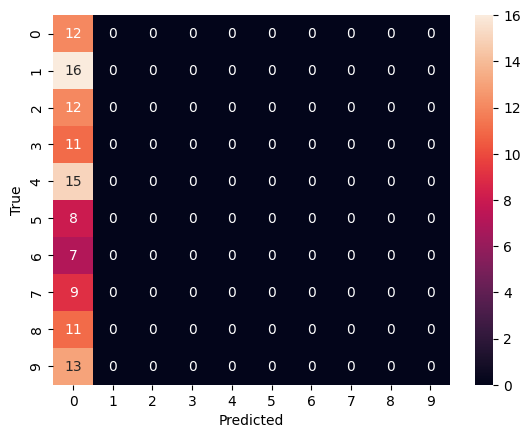

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.11      1.00      0.19        12
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        11
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00        13

    accuracy                           0.11       114
   macro avg       0.01      0.10      0.02       114
weighted avg       0.01      0.11      0.02       114

